In [5]:
%matplotlib inline

# Gear shifts on track

Plot which gear is being used at which point of the track


Import FastF1 and load the data



In [6]:
import fastf1

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np


fastf1.Cache.enable_cache('../doc_cache')  # replace with your cache directory

session = fastf1.get_session(2021, 'Austrian Grand Prix', 'Q')
session.load()
lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v2.3.2]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching tr

Prepare the data for plotting by converting it to the appropriate numpy
data types



In [7]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

Create a line collection. Set a segmented colormap and normalize the plot
to full integer values of the colormap



In [8]:
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

Create the plot



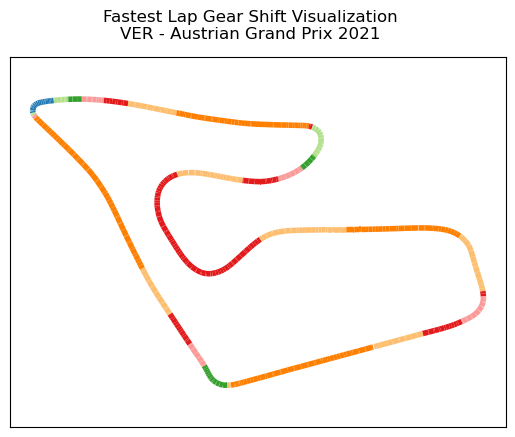

In [9]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)

Add a colorbar to the plot. Shift the colorbar ticks by +0.5 so that they
are centered for each color segment.



/var/folders/cg/_ldrqrmd0ks5yz7nw_84102r0000gn/T/ipykernel_91559/3174691261.py:1: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))


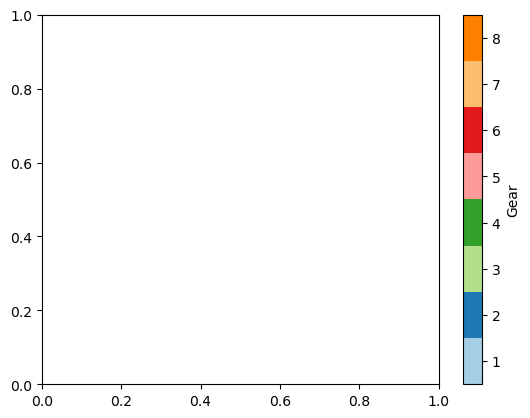

In [10]:
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()

In [14]:
print (tel.columns)

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z'],
      dtype='object')


In [15]:
print (tel.nGear.unique)


<bound method Series.unique of 2      8
3      8
4      8
5      8
6      8
      ..
548    7
549    7
550    7
551    7
552    7
Name: nGear, Length: 551, dtype: int64>


In [16]:
print (tel.nGear.unique())


[8 7 4 5 6 3 2]


In [17]:
print (tel.nGear)


2      8
3      8
4      8
5      8
6      8
      ..
548    7
549    7
550    7
551    7
552    7
Name: nGear, Length: 551, dtype: int64


In [25]:
print(lap)

Time                      0 days 01:08:20.560000
DriverNumber                                  33
LapTime                   0 days 00:01:03.720000
LapNumber                                     11
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:16.203000
Sector2Time               0 days 00:00:28.279000
Sector3Time               0 days 00:00:19.238000
Sector1SessionTime        0 days 01:07:33.043000
Sector2SessionTime        0 days 01:08:01.322000
Sector3SessionTime        0 days 01:08:20.560000
SpeedI1                                    312.0
SpeedI2                                    252.0
SpeedFL                                    289.0
SpeedST                                    315.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     2.0
FreshTyre                                   True
Stint               

In [26]:
print(lap.Driver)


VER


In [21]:
lap = session.laps.pick_driver('VER').pick_fastest()
tel = lap.get_telemetry()